In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Read Data from CSV

In [2]:
data = pd.read_csv('UNdata_Export_Deaths by area.csv')

In [3]:
data.head()

,Country,Year,Rural,Total,Urban
0,Åland Islands,1953,0.0,260.0,0.0
1,Åland Islands,1954,0.0,244.0,0.0
2,Åland Islands,1955,0.0,200.0,0.0
3,Åland Islands,1956,0.0,209.0,0.0
4,Åland Islands,1957,0.0,248.0,0.0


#### Get data insights

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 5 columns):
Country    7652 non-null object
Year       7652 non-null int64
Rural      7652 non-null float64
Total      7652 non-null float64
Urban      7652 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 299.0+ KB


### Lets normalize data

In [5]:
# # Normalize the value column and drop old column

# # Create x, where x the 'Value' column's values as floats
# x = data[['Value']].values.astype(float)

# # Create a minimum and maximum processor object
# min_max_scaler = preprocessing.MinMaxScaler()

# # Create an object to transform the data to fit minmax processor
# x_scaled = min_max_scaler.fit_transform(x)

# # Run the normalizer on the dataframe
# df_normalized = pd.DataFrame(x_scaled)
# df_normalized['normalized'] = pd.DataFrame(x_scaled)
# df_normalized.drop(columns=0,inplace=True)

# data_new = pd.concat([data,df_normalized ], axis=1)
# data_new.drop(columns='Value',inplace=True)

In [6]:
# # Check new dataframe with normalized value
# data_new.head()

#### Using tsfresh to extract features from data

In [ ]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data, column_id="Country", column_sort="Year")

Feature Extraction:  80%|████████  | 8/10 [01:00<00:13,  6.73s/it]

In [ ]:
#Check extracted features
extracted_features.head()

In [ ]:
#Check shape of new data with extracted features
extracted_features.shape

In [ ]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

In [ ]:
# it seems 568 columns out of 794 have some null values

In [ ]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

In [ ]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

In [ ]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()
data_after_impute.head()

In [ ]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] not in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [ ]:
# check new df with added column as label 
data_after_impute.head()

In [ ]:
data_after_impute.shape

In [18]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['index','id','label'])

In [19]:
y.value_counts()

1    151
0     33
Name: label, dtype: int64

In [20]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [21]:
y_test.value_counts()

1    67
0     7
Name: label, dtype: int64

In [22]:
y_train.value_counts()

1    84
0    26
Name: label, dtype: int64

#### Lets try different classifiers on the data

##### KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.20      0.43      0.27         7
          1       0.93      0.82      0.87        67

avg / total       0.86      0.78      0.82        74

Accuracy is:  0.7837837837837838


###### KNN with k ranging from 1 to 15

[0.7702702702702703, 0.6891891891891891, 0.7702702702702703, 0.7162162162162162, 0.7837837837837838, 0.7297297297297297, 0.7837837837837838, 0.7702702702702703, 0.8243243243243243, 0.7837837837837838, 0.8243243243243243, 0.8243243243243243, 0.8108108108108109, 0.7972972972972973, 0.8108108108108109]


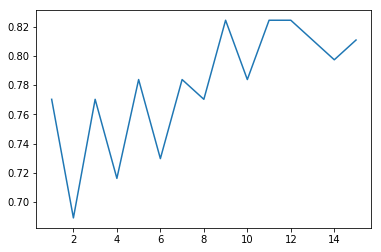

In [24]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores)  

#### Random Forest Classifier

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8952968716748244
Accuracy Score:  0.8783783783783784


#### Fine tuninng Random Forest for different number of estimators

5-------0.8952968716748244
10-------0.8952968716748244
15-------0.9055743243243244
20-------0.8952968716748244
30-------0.8952968716748244
35-------0.9055743243243244
40-------0.9055743243243244
45-------0.9055743243243244
50-------0.9055743243243244
100-------0.9055743243243244
200-------0.8952968716748244
300-------0.8952968716748244


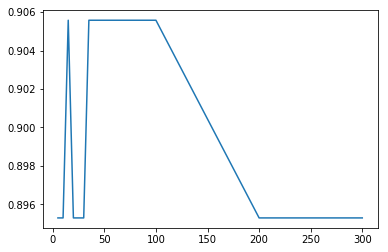

In [26]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
for i in range (0,len(estimators)):
    print(str(estimators[i]) + "-------" + str(f1_scores[i]))

#### Lets fine tune for number of features with best number of estimator from above analysis

In [27]:
rf_classifier = RandomForestClassifier(n_estimators=35, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9055743243243244
Accuracy Score:  0.8918918918918919


[0.8952968716748244, 0.8851448851448851, 0.9055743243243244, 0.8952968716748244, 0.9055743243243244, 0.8750834312573442, 0.9185642335248635, 0.8952968716748244, 0.9081159081159081, 0.8819679054054054, 0.8819679054054054]


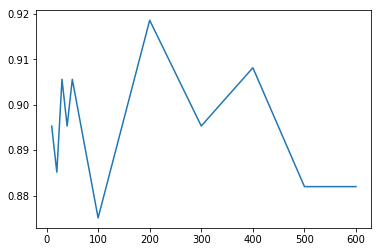

In [28]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=30,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Logistic regression model

In [29]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.7934637042142113
Accuracy Score:  0.7432432432432432


#### Extra tree classifier

In [30]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8750834312573442
Accuracy Score:  0.8513513513513513


[0.8750834312573442, 0.8750834312573442, 0.8952968716748244, 0.8851448851448851, 0.8952968716748244, 0.8952968716748244, 0.8952968716748244, 0.8952968716748244, 0.8952968716748244, 0.8952968716748244, 0.8952968716748244, 0.8851448851448851]


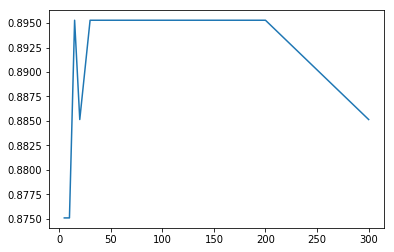

In [31]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [32]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8952968716748244
Accuracy Score:  0.8783783783783784


#### fine tune for max_features

[0.8650828247602441, 0.8977955346650999, 0.8977955346650999, 0.8851448851448851, 0.8851448851448851, 0.8851448851448851, 0.9160188340114901, 0.8952968716748244, 0.8523713278495887, 0.8875690206335367, 0.862173862173862]


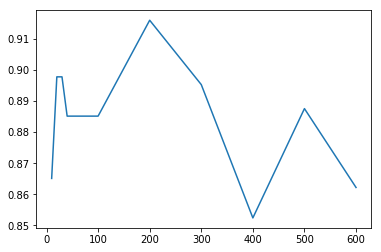

In [33]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=20,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Recursive Feature Elimination 

In [34]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 1036
Best features : Index(['Total__fft_coefficient__coeff_4__attr_"angle"',
       'Total__fft_coefficient__coeff_4__attr_"imag"',
       'Total__fft_coefficient__coeff_4__attr_"real"',
       'Total__fft_coefficient__coeff_50__attr_"abs"',
       'Total__fft_coefficient__coeff_50__attr_"angle"',
       'Total__fft_coefficient__coeff_50__attr_"imag"',
       'Total__fft_coefficient__coeff_50__attr_"real"',
       'Total__fft_coefficient__coeff_51__attr_"abs"',
       'Total__fft_coefficient__coeff_51__attr_"angle"',
       'Total__fft_coefficient__coeff_51__attr_"imag"',
       ...
       'Urban__symmetry_looking__r_0.8500000000000001',
       'Urban__symmetry_looking__r_0.9',
       'Urban__symmetry_looking__r_0.9500000000000001',
       'Urban__time_reversal_asymmetry_statistic__lag_1',
       'Urban__time_reversal_asymmetry_statistic__lag_2',
       'Urban__time_reversal_asymmetry_statistic__lag_3',
       'Urban__value_count__value_-inf', 'Urban__value

In [35]:
cols = X_train.columns[rfecv.support_]

In [36]:
X = X[cols]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.25      0.57      0.35         7
          1       0.95      0.82      0.88        67

avg / total       0.88      0.80      0.83        74

Accuracy is:  0.7972972972972973


[0.6891891891891891, 0.6756756756756757, 0.7837837837837838, 0.6891891891891891, 0.7297297297297297, 0.7162162162162162, 0.7837837837837838, 0.7837837837837838, 0.8243243243243243, 0.7972972972972973, 0.8648648648648649, 0.8243243243243243, 0.8513513513513513, 0.7972972972972973, 0.8243243243243243]


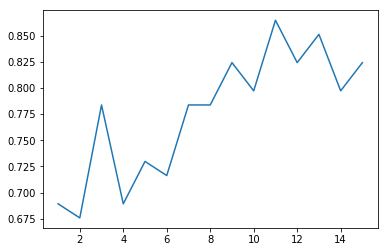

In [39]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

[0.9022407022407024, 0.8851448851448851, 0.8920242151576301, 0.8851448851448851, 0.9055743243243244, 0.9055743243243244, 0.8952968716748244, 0.8952968716748244, 0.8952968716748244, 0.9055743243243244, 0.8952968716748244, 0.8952968716748244]


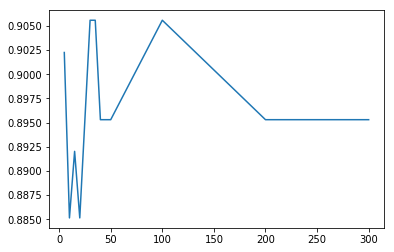

In [42]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.46      0.86      0.60         7
          1       0.98      0.90      0.94        67

avg / total       0.93      0.89      0.91        74

Accuracy is:  0.8918918918918919
